Dimensões da imagem:  (835, 1115, 3)
Imagem original:


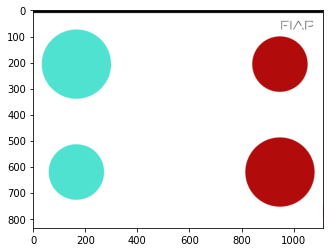

Imagem depois da limpeza:


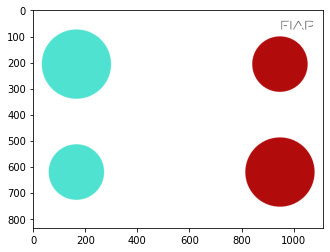

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leio a imagem e a converto para RGB
img = cv2.imread('circulo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Vendo as dimensões originais da imagem
print("Dimensões da imagem: ", img_rgb.shape)

#Mostro a imagem do jeito que ela está agora, antes de qualquer tratamento
print("Imagem original:")
plt.imshow(img_rgb)
plt.show()

#Essas 2 linhas estão servindo para eu poder ter uma variável (eixoYMetade),
#Que sirva como a representação do que é o meio da imagem (no eixo y)
eixoY = int(img_rgb.shape[0])
eixoYMetade = int(eixoY/2)


#Aqui estou limpando a imagem de algumas manchas que atrapalhariam no futuro
for y in range(0, 30):
  for x in range(0, img_rgb.shape[1]):
      img_rgb[y,x]= (255,255,255)   
        
for y in range(0, img_rgb.shape[0]):
  for x in range(1110, img_rgb.shape[1]):
      img_rgb[y,x]= (255,255,255)           


print("Imagem depois da limpeza:")
plt.imshow(img_rgb)
plt.show()
        



Aqui, a imagem está apresentando apenas os círculos grandes


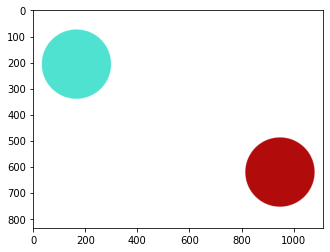

Imagem após igualização de cor dos 2 círculos


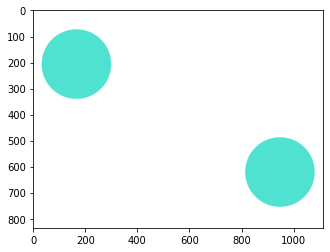

Imagem após a filtragem


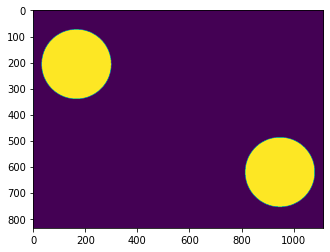

In [2]:

#Nessa parte, uso várias vezes minha variável previamente definida (eixoYMetade), que me indica o meio do eixo y
#para conseguir percorrer partes mais precisas da imagem

#Estou fazendo um filtro pra que ele ignore o quadrante superior direito da imagem (que contém a bolinha menor)
#E pinte tudo de branco
for y in range(0, eixoYMetade):
  for x in range(0, img_rgb.shape[1]):
    if x > 500:
      img_rgb[y,x]= (255,255,255)
    

#Aqui o filtro é pra ignorar o quadrante inferior esquerdo (que também contem uma bolinha menor), e pinte de branco
for y in range(eixoYMetade, img_rgb.shape[0]):
  for x in range(0, img_rgb.shape[1]):
    if x < 500:
      img_rgb[y,x]= (255,255,255)
    

print("Aqui, a imagem está apresentando apenas os círculos grandes")
plt.imshow(img_rgb)
plt.show()
    
    
#Aqui, estou filtrando para que os 2 círculos maiores fiquem da mesma cor (para podermos trabalhar com eles depois).
#Percorro a imagem inteira, e qualquer pixel que não for inteiramente branco, se tornará ciano.
for y in range(0, img_rgb.shape[0]):
  for x in range(0, img_rgb.shape[1]):
    if img_rgb[y,x, 0] != 255 and img_rgb[y,x, 1] != 255 and img_rgb[y,x, 2] != 255:
        img_rgb[y,x] = (79,226,208)
                        
print("Imagem após igualização de cor dos 2 círculos")
plt.imshow(img_rgb)
plt.show()
    
                          
#Aqui estou definindo os limites (mínimo e máximo) para filtrar minha imagem, e manter só o que está dentro desse limite
image_lower = np.array([70, 0, 0])  
image_upper = np.array([120, 255, 255])
    
    
#Realizando o filtro na imagem img_rgb, e devolvendo o resultado para ela mesmo
img_rgb = cv2.inRange(img_rgb, image_lower, image_upper)

print("Imagem após a filtragem")
plt.imshow(img_rgb)
plt.show()




Imagem depois de realizar o contorno dos círculos


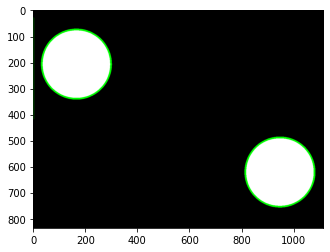

A área da imagem 1 é: 55378.0
A área da imagem 2 é: 55361.5
centro de massa da imagem 1 na posição:  945 620
centro de massa da imagem 1 na posição:  165 206


In [3]:

#Buscando o contorno dos círculos presentes na imagem, me é retornado 2 (pois apenas eles existem), no array contornos.
contornos, _ = cv2.findContours(img_rgb, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

#Passo a imagem para a escala necessária para realizar o contorno
mask_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_GRAY2RGB) 

#desenho um contorno verde nos 2 círculos da imagem
cv2.drawContours(mask_rgb, contornos, -1, [0, 255, 0], 5);

print("Imagem depois de realizar o contorno dos círculos")
plt.imshow(mask_rgb)
plt.show()

#Aqui estou definindo em variáveis os 2 círculos que já foram definidos previamente para realizar o contorno
#Irei usar essas variáveis tanto para pegar a área quanto o centro dos círculos
contorno1 = contornos[0]
contorno2 = contornos[1]

#Com o método contourArea eu estou pegando o valor da área de cada um dos círculos
area1 = cv2.contourArea(contorno1)
area2 = cv2.contourArea(contorno2)

print("A área da imagem 1 é:", area1)
print("A área da imagem 2 é:", area2)


#Nesse método eu estou pegando o "momento" dos círculos,
#ele vai me retornar informações para que eu consiga definir o ponto central de cada um dos círculos
centro1 = cv2.moments(contorno1)
centro2 = cv2.moments(contorno2)

# Calculo das coordenadas do centro de massa dos 2 círculos (no eixo y e no eixo x)
centroXimg1 = int(centro1['m10']/centro1['m00'])
centroYimg1 = int(centro1['m01']/centro1['m00'])

centroXimg2 = int(centro2['m10']/centro2['m00'])
centroYimg2 = int(centro2['m01']/centro2['m00'])


print("centro de massa da imagem 1 na posição: ",centroXimg1, centroYimg1)
print("centro de massa da imagem 1 na posição: ",centroXimg2, centroYimg2)



Imagem depois de desenhar a cruz marcando o centro


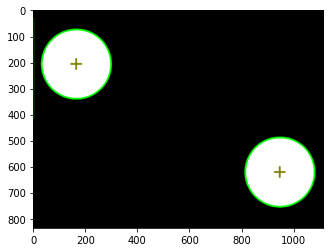

In [4]:

#Aqui estou definindo algumas variáveis que vão me ajudar futuramente, relacionadas a cores de linhas, tamanho, e fonte.
size = 20
color = (128,128,0)
font = cv2.FONT_HERSHEY_SIMPLEX

#Aqui estou desenhando, no ponto central dos 2 círculos, uma pequena cruz para marcar onde é o centro de cada um deles.
#Note que utilizei as variáveis de controle que defini anteriormente
cv2.line(mask_rgb,(centroXimg1 - size,centroYimg1),(centroXimg1 + size,centroYimg1),color,5)
cv2.line(mask_rgb,(centroXimg1,centroYimg1 - size),(centroXimg1, centroYimg1 + size),color,5)

cv2.line(mask_rgb,(centroXimg2 - size,centroYimg2),(centroXimg2 + size,centroYimg2),color,5)
cv2.line(mask_rgb,(centroXimg2,centroYimg2 - size),(centroXimg2, centroYimg2 + size),color,5)


print("Imagem depois de desenhar a cruz marcando o centro")
plt.imshow(mask_rgb)
plt.show()



Imagem depois de inserir as informações do ponto central de cada círculo


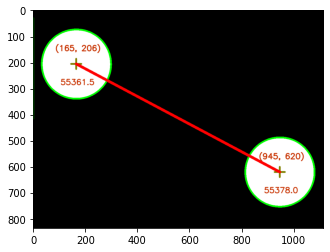

Imagem depois de inserir as informações que informam a área de cada círculo


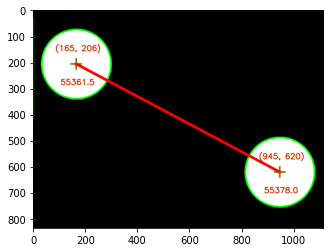

Imagem final, depois de desenhar a linha que vai de um ponto central a outro


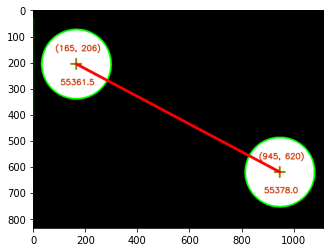

Obrigado! Trabalho realizado por Eric Luiz Campos Pessoa, em setembro de 2021


In [6]:

#Aqui eu estou definindo como meu futuro texto impresso no círculo será
#Esse texto informará qual o ponto central de cada círculo
textImage1 = centroXimg1,centroYimg1
textImage2 = centroXimg2,centroYimg2


#Definindo variáveis que informam tanto a área dos círculos quanto o ponto central deles.
#Estão com algumas variações para ficar definido em uma posição melhor dentro de cada um dos círculos
placeText1 = (centroXimg1 - 80,centroYimg1 - 50)
placeText2 = (centroXimg2 - 80,centroYimg2 - 50)

placeArea1 = (centroXimg1 - 60,centroYimg1 + 80)
placeArea2 = (centroXimg2 - 60,centroYimg2 + 80)



#Colocando o texto das informações do ponto central de cada círculo em cada uma das imagens
cv2.putText(mask_rgb, str(textImage1), placeText1, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(mask_rgb, str(textImage2), placeText2, font,1,(200,50,0),2,cv2.LINE_AA)

print("Imagem depois de inserir as informações do ponto central de cada círculo")
plt.imshow(mask_rgb)
plt.show()

#Colocando o texto das informações da área de cada círculo em cada uma das imagens
cv2.putText(mask_rgb, str(area1), placeArea1, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(mask_rgb, str(area2), placeArea2, font,1,(200,50,0),2,cv2.LINE_AA)

print("Imagem depois de inserir as informações que informam a área de cada círculo")
plt.imshow(mask_rgb)
plt.show()


#Agora, estou desenhando uma linha vermelha que começa no ponto central do círculo 1 (o de baixo), e vai até
#o ponto central do círculo 2 (o de cima)
cv2.line(mask_rgb, (centroXimg1, centroYimg1), (centroXimg2, centroYimg2), (255,0,0), 10)


print("Imagem final, depois de desenhar a linha que vai de um ponto central a outro")
plt.imshow(mask_rgb)
plt.show()


print("Obrigado! Trabalho realizado por Eric Luiz Campos Pessoa, em setembro de 2021")